# <center> Unlocking Automotive Trends with Data Analytics </center>


# Project Objectives
The objective of the project is to analyze a car dataset to gain insights into popular trends and 
identify key factors for launching promising car models.
Extract actionable insights from the given data, addressing key areas such as categorizing 
cars based on market segmentation, conducting fuel efficiency analysis, comparing 
performance, studying weight distribution, assessing safety features, exploring user comfort, 
analyzing alert systems, and conducting dimensional analysis.

## Importing necessary libraries

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Importing

In [5]:
df = pd.read_excel("C:\\Users\\vinay\\Downloads\\Car_Data.xlsx")
print("The size of the dataset is:",df.shape)
print("Where row count is:",df.shape[0])
print("Where column count is:",df.shape[1])

The size of the dataset is: (1276, 139)
Where row count is: 1276
Where column count is: 139


# Part -1

# The objective of this sprint is to clean the dataset, if necessary, categorize cars based on market segmentation, conduct fuel efficiency analysis, and summarize your key findings.

# Market Segmentation Analysis

In [96]:
df['Body_Type'].isnull().sum() # Checking Null values

1081

In [97]:
df["Body_Type"].fillna("Not Provided", inplace = True) # Missing value imputation

# Task 1

# A new car manufacturer wants to introduce a new car and wants information about the top 5 most preferred car body types. Display the result using a horizontal bar chart

In [98]:
df.sample(3)

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
1039,1039,Toyota,Prius,Z8,1798.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Longitudinal",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN
1238,1238,Toyota,Yaris,V (O) Cvt,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
1249,1249,Skoda,Octavia,Onyx 1.8 Tsi Dsg,1798.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN


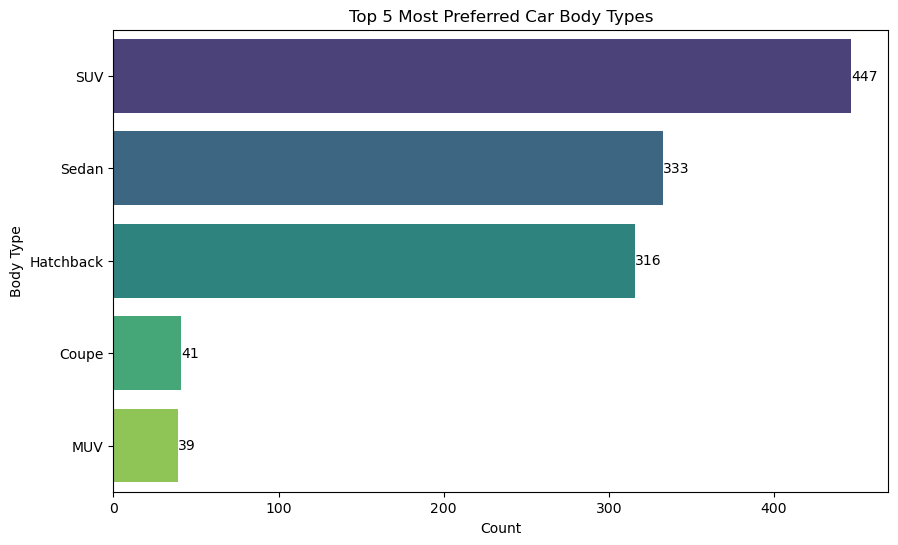

In [99]:
# Filtering the data  
body_type_counts = df['Body_Type'].value_counts().head(5)

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=body_type_counts.values, y=body_type_counts.index, palette='viridis')

# Display count values on the bars
for index, value in enumerate(body_type_counts.values):
    plt.text(value, index, str(value), ha='left', va='center', color='black')

plt.xlabel('Count')
plt.ylabel('Body Type')
plt.title('Top 5 Most Preferred Car Body Types')
plt.show()# Displaying the graph

# Interpretation:
    The above visualized are the top 5 popular and most prefereed Car body types
    Among which SUV, Sedan and Hatchback are popular.

# Task 2

# List all the details of cars that can adapt to various driving conditions such as normal, comfort, eco, sport, and power mode. How many cars have all the above-mentioned features?


In [ ]:
df["Drive_Modes"].isnull().sum() # Checking for null values

In [ ]:
df["Drive_Modes"].fillna("Not Provided", inplace=True) # Missing value imputation

In [100]:
All_Drive_Modes = df[df["Drive_Modes"]== "Normal, Comfort, Eco, Sport, Power Mode"]
print("No of cars having all 5 driving mode namely Normal, Comfort, Eco, Sport, Power mode is:", All_Drive_Modes.shape[0])

No of cars having all 5 driving mode namely Normal, Comfort, Eco, Sport, Power mode is: 2


In [156]:
All_Drive_Modes

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
321,321,Audi,Q8,55 Tfsi Quattro Tiptronic,2995.0,4.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,"Roller cam follower, continuous intake and exh...",Yes,Yes,NaN,Yes,Yes,NaN,NaN
330,330,Audi,A8 L,55 Tfsi Quattro,2995.0,8.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN


# Interpretaion:
    The Cars named Audi Q8 and Audi A8L has all the different types of driving modes like Normal,
    Comfort, Eco, Sport and Power

# Fuel Effeciency Analysis

# Evaluate the fuel efficiency of different car models by analyzing city and highway mileage, helping manufacturers focus on eco-friendly designs.

# Task 3

# Identify the top 10 car manufacturers based on the city mileage and display the result using a horizontal bar graph with the manufacturer on the y-axis and mileage on the x-axis. Do you notice any outliers in the above output? If yes, what is the reason, and how would you resolve it?

In [101]:
# Finding the outliers
city_mileage_column = df['City_Mileage_km_litre']

Q1 = city_mileage_column.quantile(0.25)   #the first quartile range
Q3 = city_mileage_column.quantile(0.75)   #the third quartile range
IQR = Q3 - Q1 #IQR-Inter Quartile Range

lower_fence = Q1 - 1.5 * IQR   #value lower than this will be considered as a outlier
upper_fence = Q3 + 1.5 * IQR   #value above than this will be considered as a outlier

outliers = (city_mileage_column < lower_fence) | (city_mileage_column > upper_fence)
outlier_rows = df[outliers].iloc[:,11]   

print("The total outliers in age are",outlier_rows.shape[0])
print("Lower fence:",lower_fence)
print("Upper fence:",upper_fence)

The total outliers in age are 5
Lower fence: -0.049999999999998934
Upper fence: 30.75


In [102]:
# Looking at the data which has outliers
filtered_data = df[(df['City_Mileage_km_litre']>upper_fence)]
filtered_data

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
615,615,Mahindra,E2O Plus,P4,NaN,NaN,NaN,RWD (Rear Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210 ampere-hour,110 km/full charge
616,616,Mahindra,E2O Plus,P6,NaN,NaN,NaN,RWD (Rear Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210 ampere-hour,110 km/full charge
687,687,Mahindra,E Verito,D4,72.0,NaN,NaN,FWD (Front Wheel Drive),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200 ampere-hour,110 km/full charge
688,688,Mahindra,E Verito,D2,72.0,NaN,NaN,FWD (Front Wheel Drive),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200 ampere-hour,110 km/full charge
689,689,Mahindra,E Verito,D6,72.0,NaN,NaN,FWD (Front Wheel Drive),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,200 ampere-hour,110 km/full charge


In [146]:
# Missing value treatmet by using group by and filling null values by mean of respective Manufacturer
def fill_missing_city_mileage(group):
    group['City_Mileage_km_litre'] = group['City_Mileage_km_litre'].fillna(group['City_Mileage_km_litre'].mean())
    return group

df = df.groupby("Make").apply(fill_missing_city_mileage)

C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\2732087290.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby("Make").apply(fill_missing_city_mileage)


In [104]:
df["City_Mileage_km_litre"].isnull().sum() # Chcking for null values

62

In [105]:
df["City_Mileage_km_litre"].fillna(np.mean,inplace=True) # Missing value imputation

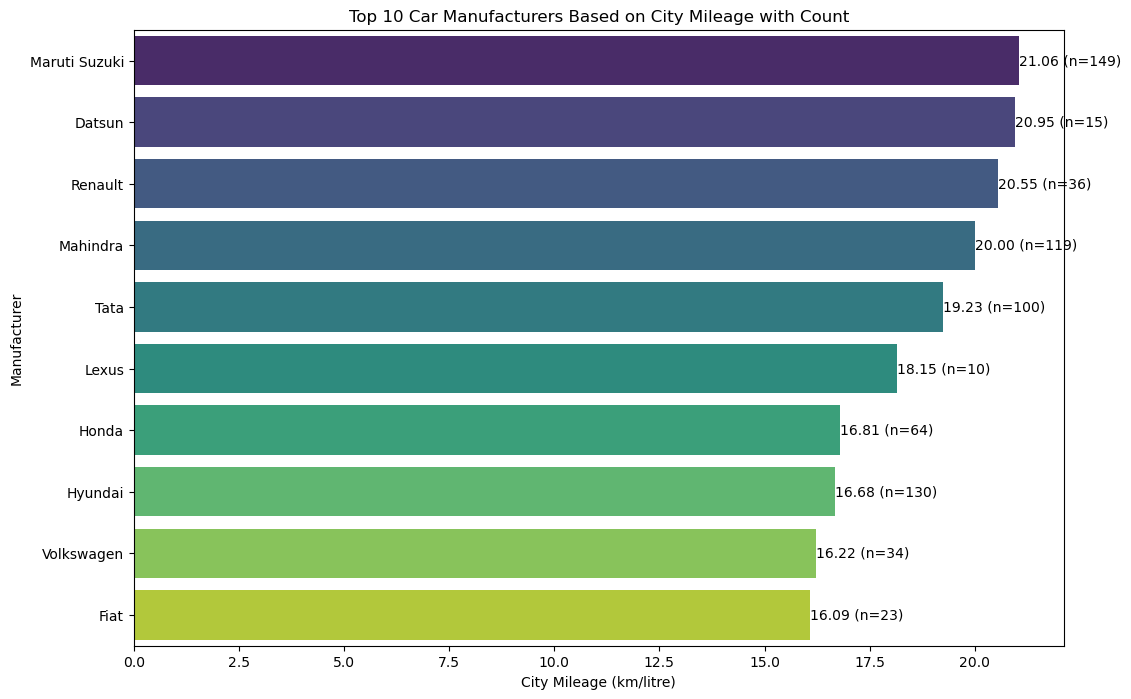

In [107]:
# Convert 'City_Mileage_km_litre' column to numeric
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')

# Remove rows with missing values in 'City_Mileage_km_litre'
df = df.dropna(subset=['City_Mileage_km_litre'])

manufacturers_data = df.groupby('Make')['City_Mileage_km_litre'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).head(10)

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='mean', y=manufacturers_data.index, data=manufacturers_data, palette='viridis')

# Display count values on the bars
for index, value in enumerate(manufacturers_data['mean']):
    ax.text(value, index, f'{value:.2f} (n={manufacturers_data["count"].iloc[index]})', ha='left', va='center', color='black')

plt.xlabel('City Mileage (km/litre)')
plt.ylabel('Manufacturer')
plt.title('Top 10 Car Manufacturers Based on City Mileage with Count')
plt.show()

# Interpretation:
    * The above 10 cars manufacturers are are best when it comes on the city mileage.
    * There are 5 cars wwhich having unusal mileage, and for this there is no need for outlier
      treatement becase those car might give higher mileage

# Task 4

# Identify the top 20 non-electric car manufacturers based on city mileage and display the results using a bar graph similar to that in task 1. 

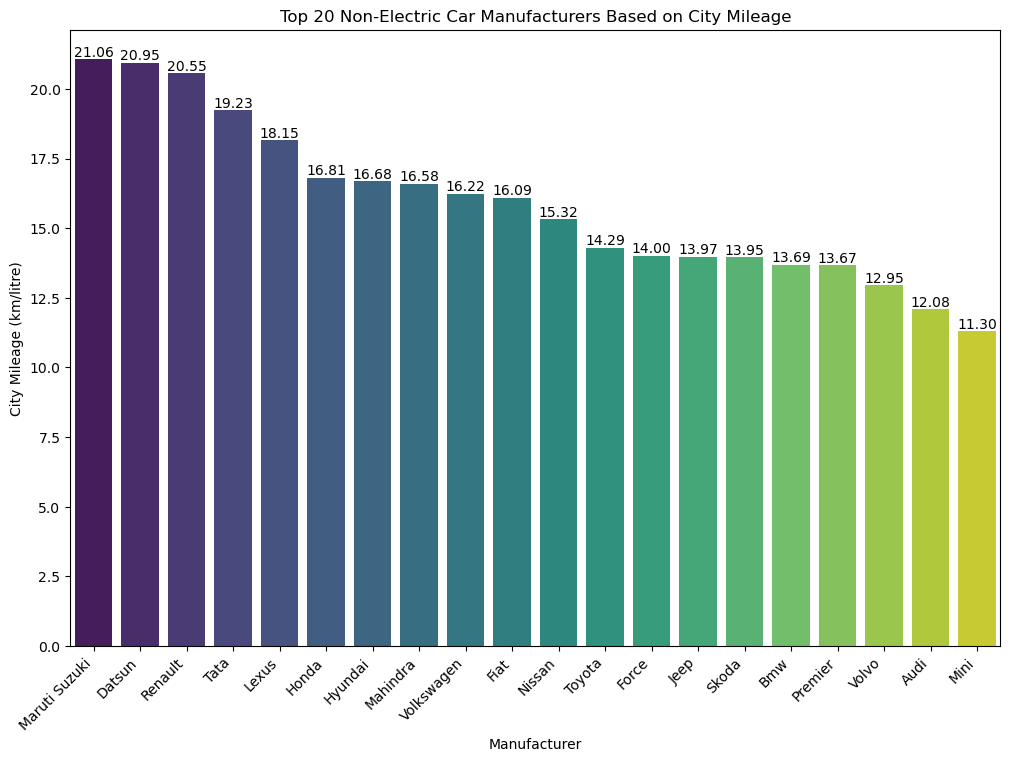

In [108]:
# Filtering the data baseed on Fuel type
non_electric_df = df[df['Fuel_Type'].isin(['Petrol', 'Hybrid', 'CNG', 'CNG + Petrol', 'Diesel'])]
# Using group by on manufacturer and finding avg city mileage
top_manufacturers_non_electric = non_electric_df.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=False).head(20)
# Create a bar chart using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_manufacturers_non_electric.index, y=top_manufacturers_non_electric.values, palette='viridis')
plt.xlabel('Manufacturer')
plt.ylabel('City Mileage (km/litre)')
plt.title('Top 20 Non-Electric Car Manufacturers Based on City Mileage')
plt.xticks(rotation=45, ha='right')
# Display values on top of the bars
for index, value in enumerate(top_manufacturers_non_electric.values):
    ax.text(index, value, f'{value:.2f}', ha='center', va='bottom', color='black')
plt.show()# Displaying the graph

# Interpretation:
    * The above are top 20 non-electric car manufacturers.
    * Maruti Suzuki brand manufactures non electric cars a lot comparedwith others and it's 
      mileage is also good compared to other manufacturers

# Task 5

# Display the car mileages for the following four companies using a pivot table: 
## Hyundai, Mahindra, Renault, and Skoda
#### Create 4 separate pivot tables capturing the following details: 
#### 1. Mean of city mileage 
#### 2. Median of city mileage
#### 3. Mean of highway mileage 
#### 4. Median of highway mileage 

In [109]:
df["Highway_Mileage_km_litre"].isnull().sum()# Chcking for null values

707

In [110]:
# Missing value treatmet by using group by and filling null values by mean of respective Manufacturer
def fill_missing_highway_mileage(group):
    group["Highway_Mileage_km_litre"] = group["Highway_Mileage_km_litre"].fillna(group["Highway_Mileage_km_litre"].mean())
    return group

df = df.groupby("Make").apply(fill_missing_highway_mileage)

C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\3411030385.py:6: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df = df.groupby("Make").apply(fill_missing_highway_mileage)


In [111]:
df["Highway_Mileage_km_litre"].isnull().sum() #Cecking for null values

10

In [112]:
df["Highway_Mileage_km_litre"].fillna(np.mean,inplace=True) # Missing value treatment

In [113]:
df["Highway_Mileage_km_litre"].isnull().sum()

0

In [114]:
# Filtering particular data
Filtered_Manufacturers = df[df["Make"].isin(["Hyundai","Mahindra","Renault","Skoda"])]
Filtered_Manufacturers.shape 

(328, 139)

In [115]:
# Pivot table for Manfacturer and their avg city mileage kms
pd.pivot_table(Filtered_Manufacturers,
              index = ["Make"],
              values = ['City_Mileage_km_litre'],
              aggfunc = ["mean"])

,mean
,City_Mileage_km_litre
Make,
Hyundai,16.679853
Mahindra,20.003763
Renault,20.554286
Skoda,13.953333


# Interpretation:
    Mahindra and Renault proving higher avg city mileage compared to others

In [116]:
# Pivot table for Manufacturer and Medain of city mileage kms
pd.pivot_table(Filtered_Manufacturers,
              index = ["Make"],
              values = ['City_Mileage_km_litre'],
              aggfunc = ["median"])

,median
,City_Mileage_km_litre
Make,
Hyundai,16.679853
Mahindra,16.000000
Renault,21.040000
Skoda,13.953333


# Interpretation:
    From the above we can conclude that Renault has differentvarieties of cars which provide the 
    highes mileage 21 km/ltr

In [117]:
# Pivot table for Manufacturer and Mean of Highway Mileage kms
pd.pivot_table(Filtered_Manufacturers,
              index = ["Make"],
              values = ["Highway_Mileage_km_litre"],
              aggfunc = ["mean"])

,mean
,Highway_Mileage_km_litre
Make,
Hyundai,18.294146
Mahindra,18.140175
Renault,17.690000
Skoda,17.268529


# Interpretation:
    From this we can conclude that above mentioned car provide avg highwa mileage of 17.5

In [118]:
# Pivot table for Manufacturer and Median of Highway Mileage kms
pd.pivot_table(Filtered_Manufacturers,
              index = ["Make"],
              values = ["Highway_Mileage_km_litre"],
              aggfunc = ["median"])

,median
,Highway_Mileage_km_litre
Make,
Hyundai,18.294146
Mahindra,18.140175
Renault,17.690000
Skoda,17.268529


# Interpretation:
    Hyundai has most number of cars which gives mileage of 18.3 kms/ltr

# Task 6

# Display the mean and median values of city mileages of the following manufacturers, using a stacked column chart:
# Hyundai, Renault, Mahindra, and Skoda 

<Figure size 1200x800 with 0 Axes>

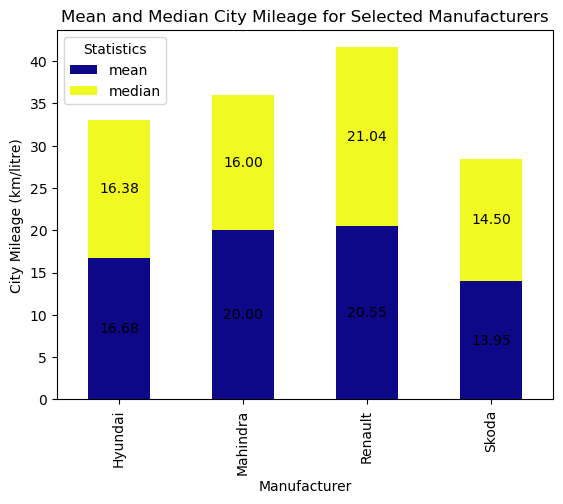

In [9]:
# Convert 'City_Mileage_km_litre' column to numeric
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')

# Filter data for the specified manufacturers
selected_manufacturers = ['Hyundai', 'Renault', 'Mahindra', 'Skoda']
filtered_df = df[df['Make'].isin(selected_manufacturers)]

# Group by 'Make' and calculate mean and median
manufacturers_stats = filtered_df.groupby('Make')['City_Mileage_km_litre'].agg(['mean', 'median'])

# Create a stacked column chart using Seaborn
plt.figure(figsize=(12, 8))
ax = manufacturers_stats.plot(kind='bar', stacked=True, colormap='plasma')

# Add labels and title
plt.xlabel('Manufacturer')
plt.ylabel('City Mileage (km/litre)')
plt.title('Mean and Median City Mileage for Selected Manufacturers')

# Display legend
plt.legend(title='Statistics', loc='upper left')

# Display values on top of the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.2f}', ha='center', va='center', color='black')

plt.show()# Displaying the graph

# Interpretation:
    From this we can conclude that Renault is the best when it comes to city mileage and has lots 
    of cars having the mileage of 21.04 kms/ltr

# Task 7

# Display the average mileage (city and highway) of all manufactures using a horizonal bar chart, in ascending order of mileage. 

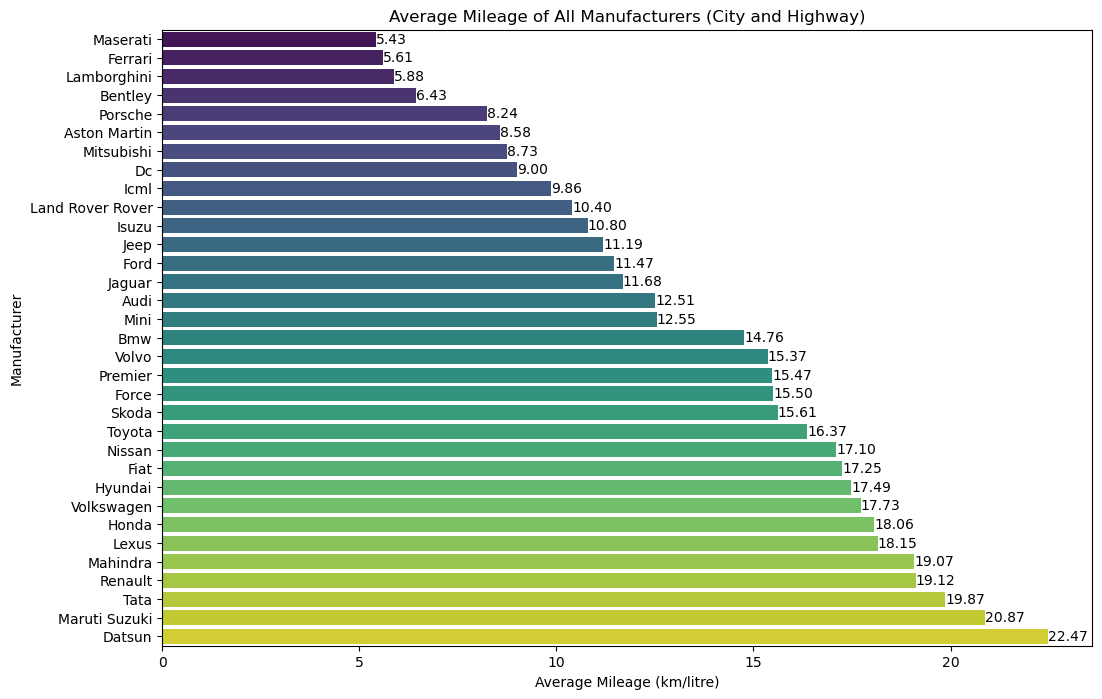

In [120]:
# Convert 'City_Mileage_km_litre' and 'Highway_Mileage_km_litre' columns to numeric
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')
df['Highway_Mileage_km_litre'] = pd.to_numeric(df['Highway_Mileage_km_litre'], errors='coerce')

# Calculate average mileage for both city and highway
df['Average_Mileage'] = df[['City_Mileage_km_litre', 'Highway_Mileage_km_litre']].mean(axis=1)

# Group by 'Make' and calculate mean of average mileage
manufacturers_avg_mileage = df.groupby('Make')['Average_Mileage'].mean().sort_values()

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=manufacturers_avg_mileage, y=manufacturers_avg_mileage.index, palette='viridis')

# Display values on the bars
for index, value in enumerate(manufacturers_avg_mileage):
    ax.text(value, index, f'{value:.2f}', ha='left', va='center', color='black')

plt.xlabel('Average Mileage (km/litre)')
plt.ylabel('Manufacturer')
plt.title('Average Mileage of All Manufacturers (City and Highway)')
plt.show()# Displaying the graph

# Interpretation:
    * The manufacturers like Datsun and Maruti Suzuki, Tata, Renault, Mahindra these kind of cars
      having higheest Average Mileage when comapred to others.
    * When it comes to Maserati and Ferrari they are cars which has higher Power and Torque so
      the fuel consumptin rate is high s that's why their avg mileage is low comopared to others.
    

# Task 8

# Plot a line chart to understand the relation between displacement and city mileage by choosing the top 10 cars with the highest city mileage. 

In [31]:
df["Displacement"].isnull().sum() # Checking for the null values

9

In [32]:
df["Displacement"].fillna("-",inplace=True) # Missing vlaue treatment

In [159]:
# Convert 'City_Mileage_km_litre' column to numeric values
df['City_Mileage_km_litre'] = pd.to_numeric(df['City_Mileage_km_litre'], errors='coerce')

# Select the top 10 cars with the highest city mileage
top_10_city_mileage = df.nlargest(10, 'City_Mileage_km_litre')

# Display the details of the top 10 cars
top_10_city_mileage[['Make', 'Model', 'Variant', 'City_Mileage_km_litre']]

,Make,Model,Variant,City_Mileage_km_litre
687,Mahindra,E Verito,D4,110.0
688,Mahindra,E Verito,D2,110.0
689,Mahindra,E Verito,D6,110.0
615,Mahindra,E2O Plus,P4,80.0
616,Mahindra,E2O Plus,P6,80.0
155,Maruti Suzuki,Dzire,Ldi,28.4
157,Maruti Suzuki,Dzire,Vdi,28.4
159,Maruti Suzuki,Dzire,Zdi Amt,28.4
160,Maruti Suzuki,Dzire,Zdi,28.4
164,Maruti Suzuki,Dzire,Zdi Plus,28.4


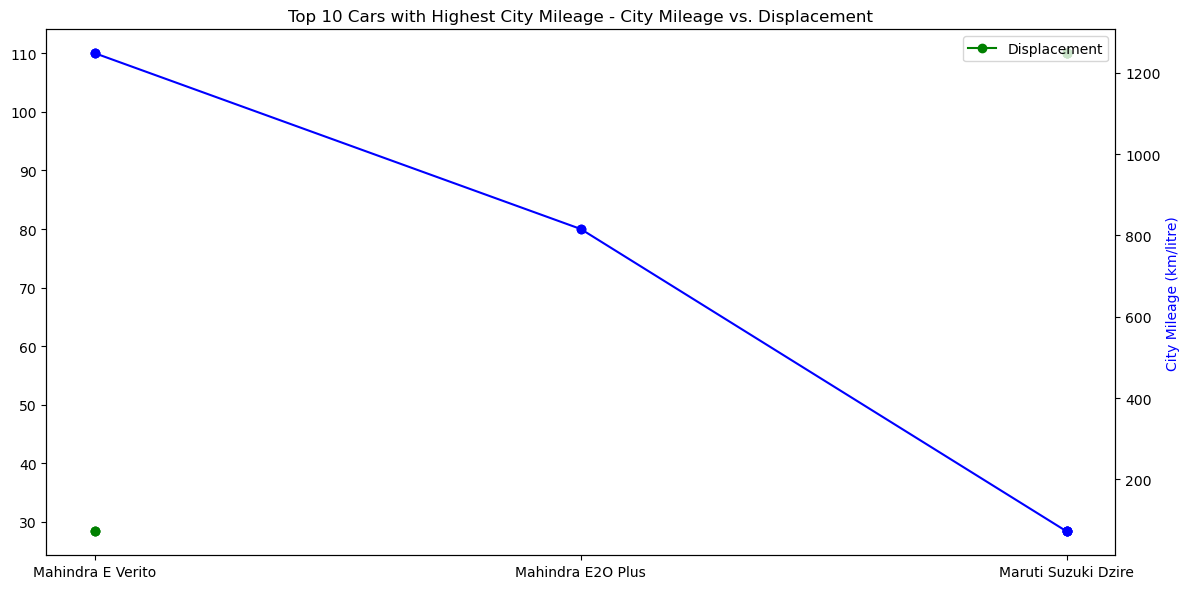

In [160]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'top_10_city_mileage'
# You may need to adjust column names based on your actual data

# Convert 'Displacement_cc' column to numeric values
top_10_city_mileage['Displacement'] = pd.to_numeric(top_10_city_mileage['Displacement'], errors='coerce')

# Create a line chart
plt.figure(figsize=(12, 6))

# Plot city mileage
plt.plot(top_10_city_mileage['Make'] + ' ' + top_10_city_mileage['Model'], top_10_city_mileage['City_Mileage_km_litre'], marker='o', linestyle='-', color='blue')

# Plot displacement on a secondary y-axis
plt.twinx()
plt.plot(top_10_city_mileage['Make'] + ' ' + top_10_city_mileage['Model'], top_10_city_mileage['Displacement'], marker='o', linestyle='-', color='green')

# Set labels and title
plt.xlabel('Car Make and Model')
plt.ylabel('City Mileage (km/litre)', color='blue')
plt.title('Top 10 Cars with Highest City Mileage - City Mileage vs. Displacement')

# Add legend
plt.legend(['City Mileage'], loc='upper left')
plt.legend(['Displacement'], loc='upper right')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation:
    Since we are some cars of same kind so we are getting only 3 manufacturers based on
    city mileage here. 
    And in general Displacement and Mileage does have Negative Correlationn that is 
    When Mileage Decrease Engine Displacement Increases and vice versa.

# Task 9

# Analyze the spread of fuel economy using a histogram for all car models of the following manufacturers:
# Hyundai, Suzuki, Tata, and BMW
# Which of these manufacturers have the most skewed mileage distribution? 
# Note: A separate histogram is required for each manufacturer

C:\Users\vinay\AppData\Local\Temp\ipykernel_12980\2387067631.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['City_Mileage_km_litre'] = pd.to_numeric(filtered_df['City_Mileage_km_litre'], errors='coerce')


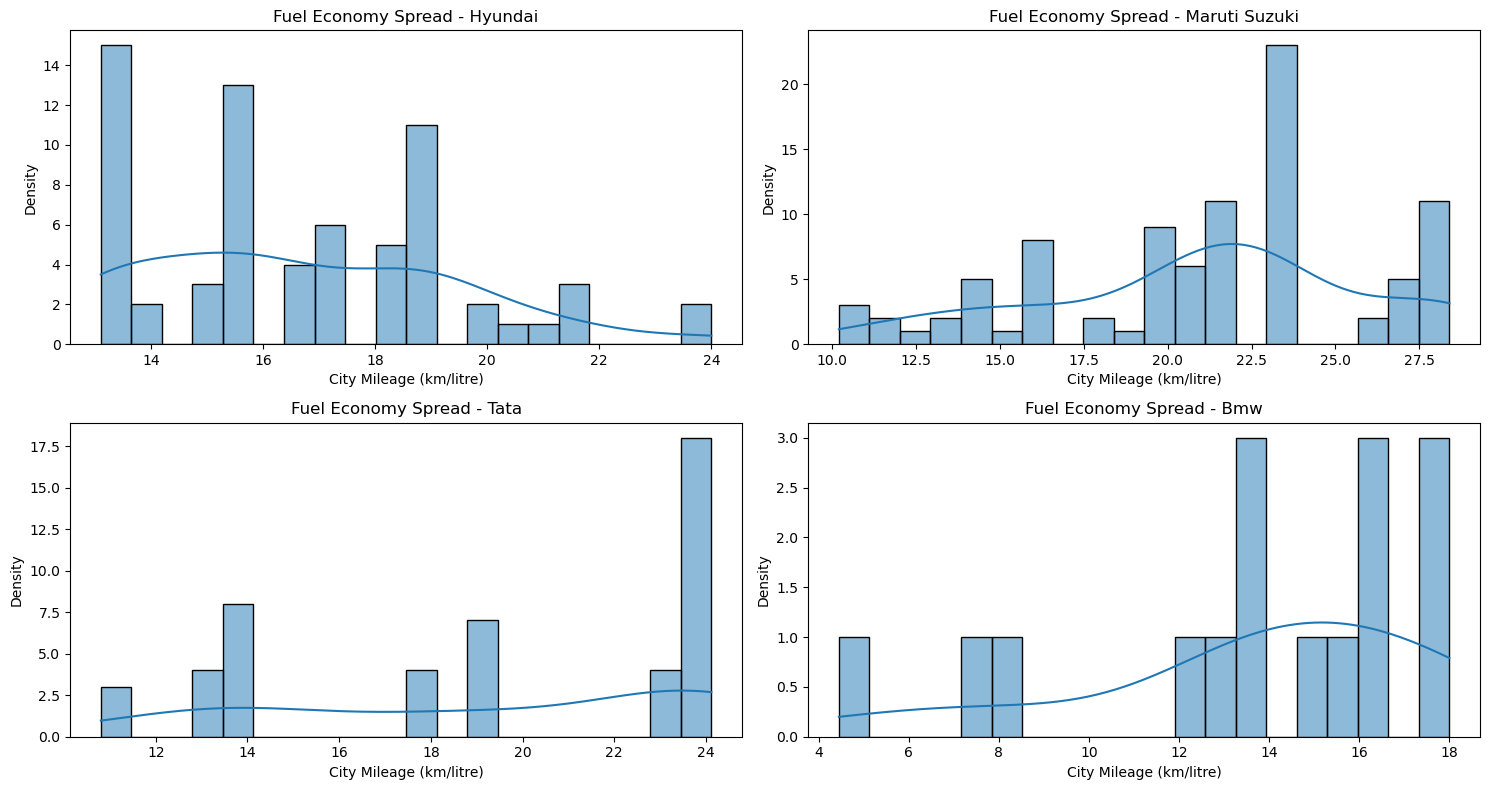

In [12]:
# Select only the specified car manufacturers
selected_manufacturers = ['Hyundai', 'Maruti Suzuki', 'Tata', 'Bmw']
filtered_df = df[df['Make'].isin(selected_manufacturers)]

# Convert 'City_Mileage_km_litre' column to numeric values
filtered_df['City_Mileage_km_litre'] = pd.to_numeric(filtered_df['City_Mileage_km_litre'], errors='coerce')

# Create separate histograms for each manufacturer
plt.figure(figsize=(15, 8))

for manufacturer in selected_manufacturers:
    manufacturer_data = filtered_df[filtered_df['Make'] == manufacturer]
    
    plt.subplot(2, 2, selected_manufacturers.index(manufacturer) + 1)
    sns.histplot(data=manufacturer_data, x='City_Mileage_km_litre', bins=20, kde=True)
    
    # Set labels and title for each subplot
    plt.xlabel('City Mileage (km/litre)')
    plt.ylabel('Density')
    plt.title(f'Fuel Economy Spread - {manufacturer}')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Interpretation:
    From above the graphs i can say that Bmww manufacturer has highest skewing data

# Part 2

# In continuation of the car data analysis, after categorizing cars based on market segmentation and conducting fuel efficiency analysis, now, in this sprint, perform tasks based on performance comparison and weight distribution study. Then, summarize your key findings.In project – part 1, we considered car data to categorize various cars based on market segmentation and fuel efficiency analysis. Let's now address the next set of business questions to identify key factors for evaluating weight distribution study and performance comparison. In this part, use the same dataset that was utilized in project – part 1.
# Write interpretations for the output produced for each task in this project.

# Task 1

# Create another data frame that includes only the following columns from the data. Perform missing value treatment for these columns, if required.
### • Valves_Per_Cylinder
### • Kerb_Weight
### • Make
### • Displacement
### • Fuel_Tank_Capacity_litre
### • City_Mileage_km_litre
### • Highway_Mileage_km_litre
### • Power
### • Torque
### • Gross_Vehicle_Weight

In [121]:
# Filtering out required column
selected_columns = [
    'Valves_Per_Cylinder',
    'Kerb_Weight',
    'Make',
    'Displacement',
    'Fuel_Tank_Capacity_litre',
    'City_Mileage_km_litre',
    'Highway_Mileage_km_litre',
    'Power',
    'Torque',
    'Gross_Vehicle_Weight'
]
# Creating a new DataFrame with selected columns
new_df = df[selected_columns]

In [70]:
new_df # Displaying the df

,Valves_Per_Cylinder,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Gross_Vehicle_Weight
0,2.0,660 kg,Tata,624.0,24.0,23.600000,20.502439,38PS@5500rpm,51Nm@4000rpm,NaN
1,2.0,725 kg,Tata,624.0,24.0,23.600000,20.502439,38PS@5500rpm,51Nm@4000rpm,NaN
2,2.0,710 kg,Tata,624.0,15.0,19.233542,20.502439,38PS@5500rpm,51Nm@4000rpm,NaN
3,2.0,725 kg,Tata,624.0,24.0,23.600000,20.502439,38PS@5500rpm,51Nm@4000rpm,NaN
4,2.0,725 kg,Tata,624.0,24.0,23.600000,20.502439,38PS@5500rpm,51Nm@4000rpm,NaN
...,...,...,...,...,...,...,...,...,...,...
1271,4.0,1170 kg,Honda,1498.0,40.0,22.600000,25.100000,100PS@3600rpm,200Nm@1750rpm,1545 kg
1272,4.0,1175 kg,Honda,1498.0,40.0,22.600000,25.100000,100PS@3600rpm,200Nm@1750rpm,1550 kg
1273,4.0,1107 kg,Honda,1497.0,40.0,18.000000,18.000000,119PS@6600rpm,145Nm@4600rpm,1482 kg
1274,4.0,1080 kg,Honda,1497.0,40.0,14.300000,16.400000,119PS@6600rpm,145Nm@4600rpm,1455 kg


In [122]:
missing_values = new_df.isnull().sum()# Checking for missing values
missing_values

Valves_Per_Cylinder          82
Kerb_Weight                 283
Make                          0
Displacement                  9
Fuel_Tank_Capacity_litre     45
City_Mileage_km_litre         0
Highway_Mileage_km_litre     10
Power                         0
Torque                        2
Gross_Vehicle_Weight        508
dtype: int64

In [123]:
# Perform missing value treatment
new_df['Valves_Per_Cylinder'].fillna("-",inplace=True)
new_df['Kerb_Weight'].fillna("-",inplace=True)
new_df['Displacement'].fillna("-",inplace=True)
new_df['Fuel_Tank_Capacity_litre'].fillna(np.mean,inplace=True)
new_df['Highway_Mileage_km_litre'].fillna(np.mean,inplace=True)
new_df['Power'].fillna("N/A",inplace=True)
new_df['Torque'].fillna("N/A",inplace=True)
new_df['Gross_Vehicle_Weight'].fillna("-",inplace=True)

C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\2473018951.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Valves_Per_Cylinder'].fillna("-",inplace=True)
C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\2473018951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Kerb_Weight'].fillna("-",inplace=True)
C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\2473018951.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [124]:
# Cross checking if there are any null values after imputing
missing_values = new_df.isnull().sum()
missing_values

Valves_Per_Cylinder         0
Kerb_Weight                 0
Make                        0
Displacement                0
Fuel_Tank_Capacity_litre    0
City_Mileage_km_litre       0
Highway_Mileage_km_litre    0
Power                       0
Torque                      0
Gross_Vehicle_Weight        0
dtype: int64

# Interpretation:
    Using previously used DataFrame to create a New DataFrame and that to with particular column           mentioned above and cleaning the data

# Task 2

# Preprocess the data in the following columns as specified. 
## • Kerb_weight: Remove "kg" and ensure the column is numerical. Convert the weight in kilograms to pounds, by multiplying each value in the column with the number 2.2.
## • Power: Sample data = 38PS @ 5500rpm. All entries of the column "Power" should only contain the number 38 after cleaning. 
## • Torque: Sample data = 51Nm@4000rpm. The column "Torque" must only contain the number 51 after cleaning. Perform this operation to all entries of the column and ensure this column is converted to numerical type. 

In [125]:
# Removing string value on a column and converting it in terms of pound
new_df["Kerb_Weight"] = pd.to_numeric(df['Kerb_Weight'].astype(str).str.replace(r"kg", ''), errors='coerce')
new_df["Kerb_Weight"] = new_df["Kerb_Weight"] * 2.2

C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\2095596284.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Kerb_Weight"] = pd.to_numeric(df['Kerb_Weight'].astype(str).str.replace(r"kg", ''), errors='coerce')
C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\2095596284.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Kerb_Weight"] = new_df["Kerb_Weight"] * 2.2


In [126]:
# Using reular expression getting numeric value alone from alphanumeric data.
new_df["Power"] = new_df["Power"].str.strip ()  
new_df['Power'] = new_df['Power'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True)

C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\573757221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Power"] = new_df["Power"].str.strip ()
C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\573757221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Power'] = new_df['Power'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True)


In [127]:
# Using reular expression getting numeric value alone from alphanumeric data.
new_df["Torque"] = new_df["Torque"].str.strip()  
new_df['Torque'] = new_df['Torque'].str.replace(r"-",'', regex=True)
new_df['Torque'] = new_df['Torque'].str.replace(r"[a-zA-Z]*@[0-9]*[a-zA-Z]*",'', regex=True) 

C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\297209640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["Torque"] = new_df["Torque"].str.strip()
C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\297209640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Torque'] = new_df['Torque'].str.replace(r"-",'', regex=True)
C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\297209640.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [128]:
new_df # Checking weather it got removed properly

,Valves_Per_Cylinder,Kerb_Weight,Make,Displacement,Fuel_Tank_Capacity_litre,City_Mileage_km_litre,Highway_Mileage_km_litre,Power,Torque,Gross_Vehicle_Weight
0,2.0,1452.0,Tata,624.0,24.0,23.600000,20.502439,38,51,-
1,2.0,1595.0,Tata,624.0,24.0,23.600000,20.502439,38,51,-
2,2.0,1562.0,Tata,624.0,15.0,19.233542,20.502439,38,51,-
3,2.0,1595.0,Tata,624.0,24.0,23.600000,20.502439,38,51,-
4,2.0,1595.0,Tata,624.0,24.0,23.600000,20.502439,38,51,-
...,...,...,...,...,...,...,...,...,...,...
1271,4.0,2574.0,Honda,1498.0,40.0,22.600000,25.1,100,200,1545 kg
1272,4.0,2585.0,Honda,1498.0,40.0,22.600000,25.1,100,200,1550 kg
1273,4.0,2435.4,Honda,1497.0,40.0,18.000000,18.0,119,145,1482 kg
1274,4.0,2376.0,Honda,1497.0,40.0,14.300000,16.4,119,145,1455 kg


# Interpretation:
    For the further analysis pre proceesing the columns Kerb_weeight, Power, Torque where in 
    Kerb_weight removing kg and converting the column into numerical and similarly for Power
    and Torque removing unnecessary numbers as well as string to convert into int.

# Performance Comparision

# The performance of the cars can be compared based on various factors described in upcoming tasks which will provide valuable insights for marketing and product development.

# Task 3

# Compare the performance of cars based on factors such as displacement, cylinders, and valves per cylinder, providing valuable insights for marketing and product development.
# Hint: Calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer. 
# For the "Displacement" column, display the distribution for each manufacturer using box plots. 

                  Displacement_mean  Displacement_median  Displacement_std  \
Make                                                                         
Aston Martin            5038.333333               5198.0        986.241519   
Audi                    2256.354839               1984.0        836.304352   
Bentley                 5447.833333               5974.0       1164.710164   
Bmw                     2707.918919               2979.0        924.567237   
Datsun                  1065.066667               1198.0        179.470836   
Dc                      2000.000000               2000.0               NaN   
Ferrari                 4589.500000               3902.0       1125.891647   
Fiat                    1269.391304               1248.0         65.088568   
Force                   2447.000000               2596.0        230.829807   
Ford                    1551.325581               1498.0        635.526618   
Honda                   1444.875000               1498.0        

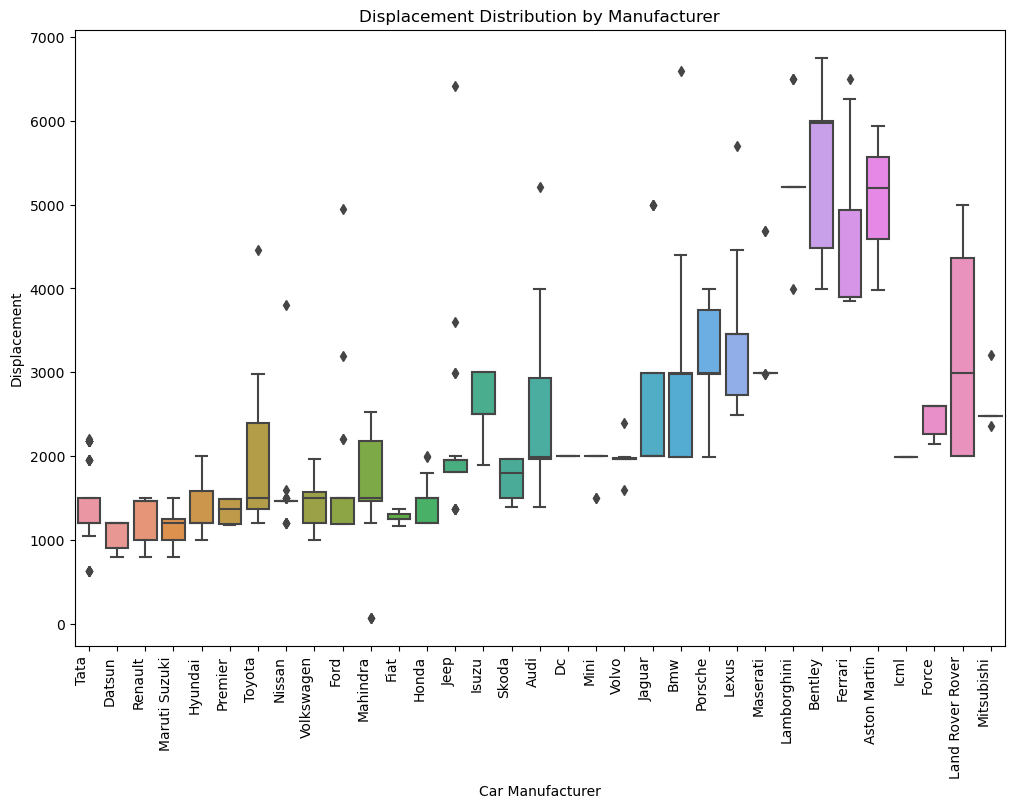

In [129]:
# Function to calculate coefficient of variation
def coefficient_of_variation(data):
    mean_value = data.mean()
    std_dev = data.std()
    if mean_value != 0:
        return (std_dev / mean_value) * 100
    else:
        return None

# List of columns to analyze
columns_to_analyze = ['Displacement', 'Cylinders', 'Valves_Per_Cylinder']

# Group by 'Make' and calculate statistics for each column
manufacturer_stats = df.groupby('Make')[columns_to_analyze].agg(['mean', 'median', 'std', coefficient_of_variation])

# Flatten the multi-index columns
manufacturer_stats.columns = ['_'.join(col).strip() for col in manufacturer_stats.columns.values]

# Display the statistics
print(manufacturer_stats)

# Box plots for 'Displacement' distribution by manufacturer with rotated x-axis labels
plt.figure(figsize=(12, 8))
sns.boxplot(x='Make', y='Displacement', data=df)
plt.title('Displacement Distribution by Manufacturer')
plt.xlabel('Car Manufacturer')
plt.ylabel('Displacement')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90,ha='right')

plt.show()

# Interpretation:
    For the manufacturers which are providing nice high avg mileage doesnt getting outliers based on displacement because as we know they are inversley related

# Task 4

# Identify at least three features that affect the mileages (using correlation analysis) of cars from the following manufactures:
# Renault, Toyota, and Honda
# Represent them visually using appropriate types of charts/graphs in Python.
# Illustrate with justification whether these factors affect the mileage of a car positively or negatively.


C:\Users\vinay\AppData\Local\Temp\ipykernel_12980\3682393425.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Power'] = selected_data['Power'].str.extract(r'(\d+)')
C:\Users\vinay\AppData\Local\Temp\ipykernel_12980\3682393425.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Torque'] = selected_data['Torque'].str.extract(r'(\d+)')
C:\Users\vinay\AppData\Local\Temp\ipykernel_12980\3682393425.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

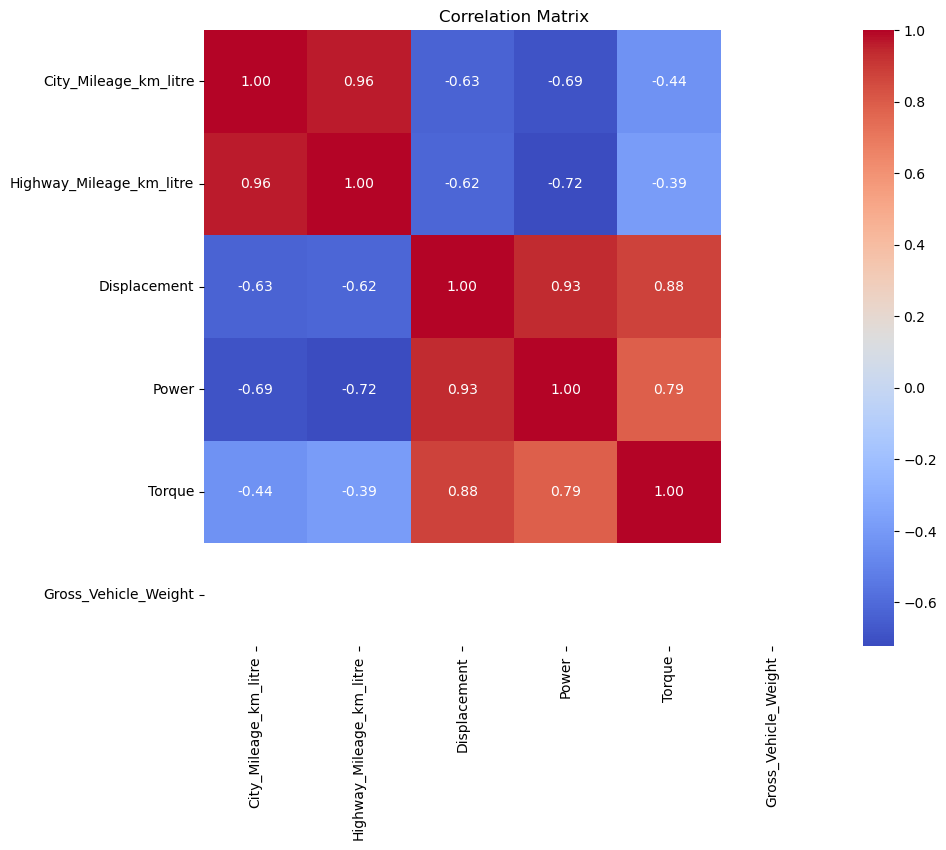

In [7]:
selected_manufacturers = ['Renault', 'Toyota', 'Honda']
selected_data = df[df['Make'].isin(selected_manufacturers)]

# Clean 'Power' and 'Torque' columns
selected_data['Power'] = selected_data['Power'].str.extract(r'(\d+)')
selected_data['Torque'] = selected_data['Torque'].str.extract(r'(\d+)')

# Select only numerical columns for correlation analysis
numerical_columns = ['City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Displacement', 'Power', 'Torque', 'Gross_Vehicle_Weight']

# Convert selected columns to numeric type
selected_data[numerical_columns] = selected_data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
correlation_matrix = selected_data[numerical_columns].corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()# Displaynig the graph

# Interpretation:
    * City Mileage or Highway Mileage are strong negatively correlateed with Power, Displacement
      and weak negatively correlated with Torque, from this we can say a Displacement or Power
      increase the fuel consumption rate is high and affecting the mileage

# Weight Distribution Study

# Investigate the kerb weight and gross vehicle weight to understand weight distribution, influencing decisions related to materials and design for optimal performance.


# Task 5

# Compare the performance of cars based on factors like kerb weight and gross vehicle weight.
# Hint: Calculate and display the mean, median, standard deviation, and coefficient of variation for each manufacturer. 

In [141]:
new_df = pd.DataFrame()  # Create a new DataFrame

# Remove 'kg' and convert to numeric, handling errors and coercing to NaN
new_df["Gross_Vehicle_Weight"] = pd.to_numeric(df['Gross_Vehicle_Weight'].astype(str).str.replace(r"kg", ''), errors='coerce')

# Display the new DataFrame and check for NaN values
print(new_df)
print("NaN values in Gross_Vehicle_Weight:", new_df["Gross_Vehicle_Weight"].isna().sum())


      Gross_Vehicle_Weight
0                      NaN
1                      NaN
2                      NaN
3                      NaN
4                      NaN
...                    ...
1271                1545.0
1272                1550.0
1273                1482.0
1274                1455.0
1275                3110.0

[1139 rows x 1 columns]
NaN values in Gross_Vehicle_Weight: 510


In [142]:
# Convert 'Kerb_Weight' and 'Gross_Vehicle_Weight' to numeric, handling errors and coercing to NaN
new_df['Kerb_Weight'] = pd.to_numeric(new_df['Kerb_Weight'].astype(str).str.replace('kg', ''), errors='coerce')
new_df['Gross_Vehicle_Weight'] = pd.to_numeric(new_df['Gross_Vehicle_Weight'].astype(str).str.replace('kg', ''), errors='coerce')

# Define a function to calculate coefficient of variation
def coefficient_of_variation(series):
    std_dev = series.std()
    mean_value = series.mean()
    return (std_dev / mean_value) * 100 if mean_value != 0 else 0

# Group data by manufacturer
grouped_data = new_df.groupby('Make')

# Calculate mean, median, standard deviation, and coefficient of variation for each manufacturer
summary_stats = grouped_data.agg({
    'Kerb_Weight': ['mean', 'median', 'std', coefficient_of_variation],
    'Gross_Vehicle_Weight': ['mean', 'median', 'std', coefficient_of_variation]
})

# Flatten the multi-level column index
summary_stats.columns = ['_'.join(col).strip() for col in summary_stats.columns.values]

# Display the summary statistics
print(summary_stats)

                  Kerb_Weight_mean  Kerb_Weight_median  Kerb_Weight_std  \
Make                                                                      
Aston Martin           1733.333333              1680.0       234.591844   
Audi                   1810.000000              1780.0       342.378932   
Bentley                2457.833333              2425.0       122.261059   
Bmw                    1716.047619              1705.0       114.828340   
Datsun                  864.000000               864.0         0.000000   
Dc                     1580.000000              1580.0              NaN   
Ferrari                1633.750000              1577.5       204.376229   
Fiat                   1200.952381              1215.0        53.370850   
Force                          NaN                 NaN              NaN   
Ford                   1270.241379              1220.0       370.617405   
Honda                  1121.580645              1093.5       156.377491   
Hyundai                11

C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\1108940533.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Kerb_Weight'] = pd.to_numeric(selected_data['Kerb_Weight'].astype(str).str.replace('kg', ''), errors='coerce')
C:\Users\vinay\AppData\Local\Temp\ipykernel_32496\1108940533.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Gross_Vehicle_Weight'] = pd.to_numeric(selected_data['Gross_Vehicle_Weight'].astype(str).str.replace('kg', ''), errors='coerce')


# Interpretation:
    Kerb_Weight ->  For Ford the coeffecient of variation is high
    Gross_weight -> For Fiat the coeffecient of variation is high.

# Part 3

# In continuation of the car data analysis, after categorizing cars based on market segmentation, fuel efficiency analysis, performance comparison, and weight distribution study, now, in this sprint, perform tasks based on safety feature assessment, user comfort exploration, alert systems analysis, and dimensional analysis. Then, summarize your key findings and provide final business conclusions.
# In project – part 1, we considered car data to categorize various cars based on market segmentation and fuel efficiency analysis. In project – part 2, weight distribution study and performance comparison have been performed. Let's now address the next set of business questions to find key factors based on safety feature assessment, user comfort exploration, alert systems analysis, and dimensional analysis. In this part, use the same cleaned dataset obtained in project – part 2.
# Write interpretations for the output produced for each task in this project. Summarize all the interpretations at the end of all tasks and provide final business conclusions.

# Safety Feature Assessment

# Task 1

# Examine the presence of safety features such as ABS, airbags, and hill assist, to assess the safety standards of various car models.


In [150]:
# Filtering the data based on certain conditions which are related to Safety Feature Assessment
Safe_cars = df[(df["ABS_(Anti-lock_Braking_System)"] == "Yes") & (~df["Airbags"].isna()) & (df["Hill_Assist"] == "Yes")]
Safe_cars

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,Average_Mileage
151,151,Volkswagen,Polo,Gt Tsi,1197.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,17.000000
168,168,Ford,Freestyle,1.5L Tdci Titanium,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,11.473750
169,169,Ford,Freestyle,1.5L Tdci Titanium Plus,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,11.473750
171,171,Ford,Freestyle,1.2L Ti-Vct Titanium,1194.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,11.473750
172,172,Ford,Freestyle,1.2L Ti-Vct Titanium Plus,1194.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,11.473750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,1253,Porsche,Cayenne Coupe,Base,2995.0,6.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,8.235714
1254,1254,Porsche,Cayenne Coupe,Turbo,2995.0,8.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,Yes,Yes,NaN,Yes,Yes,NaN,NaN,8.235714
1263,1263,Bentley,Flying Spur,V8,3993.0,8.0,4.0,AWD (All Wheel Drive),V,"Front, Longitudinal",...,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,3.000000
1264,1264,Bentley,Flying Spur,W12,5998.0,12.0,4.0,AWD (All Wheel Drive),W,"Rear, Longitudinal",...,Yes,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,3.000000


# Interpretation:
    The above cars are having Safety feature like ABS(Absolute Breaking System) & Airbags & Hill assist

# User Comfort Exploration

# Task 2

# Explore seating capacity, central locking, and child safety locks to understand user comfort and family-friendly features.
# Hint: Calculate the average seating capacity and count the occurrences of central locking and child safety locks for each model.

In [151]:
import pandas as pd

# Assuming df is your DataFrame

# Convert seating capacity to numeric (assuming it's a numerical column)
df['Seating_Capacity'] = pd.to_numeric(df['Seating_Capacity'], errors='coerce')

# Calculate average seating capacity for each model
average_seating_capacity = df.groupby('Model')['Seating_Capacity'].mean()

# Count occurrences of central locking and child safety locks for each model
central_locking_counts = df.groupby('Model')['Central_Locking'].value_counts()
child_safety_locks_counts = df.groupby('Model')['Child_Safety_Locks'].value_counts()

# Display the results
print("Average Seating Capacity:")
print(average_seating_capacity)

print("\nCentral Locking Counts:")
print(central_locking_counts)

print("\nChild Safety Locks Counts:")
print(child_safety_locks_counts)

Average Seating Capacity:
Model
718             2.0
911             4.0
3-Series        5.0
458 Speciale    2.0
458 Spider      2.0
               ... 
Xuv500          7.0
Xylo            7.2
Yaris           5.0
Z4 Roadster     2.0
Zest            5.0
Name: Seating_Capacity, Length: 226, dtype: float64

Central Locking Counts:
Model         Central_Locking
718           Yes                 2
911           Yes                 2
3-Series      Yes                 3
458 Speciale  Yes                 1
458 Spider    Yes                 1
                                 ..
Xuv500        Yes                19
Xylo          Yes                 3
Yaris         Yes                14
Z4 Roadster   Yes                 2
Zest          Yes                11
Name: Central_Locking, Length: 214, dtype: int64

Child Safety Locks Counts:
Model         Child_Safety_Locks
718           Yes                    2
911           Yes                    2
3-Series      Yes                    3
458 Speciale  Yes 

# Interpretation:
    Based on car models the stat is about Avg seating capacity, Central locking count, child 
    safety count

# Alert System Analysis

# Task 3

# Investigate the presence of high-speed alerts, seat belt reminders, and door ajar warnings to assess the integration of safety and convenience features.

In [152]:
# Filtering data based on certain criterias like High_speed_alert system and Seat belt warning 
# and Door ajar warning. 
Alert_system_cars = df[(df["High_Speed_Alert_System"]=="Yes") & (df["Fasten_Seat_Belt_Warning"]=="Yes") & (df["Door_Ajar_Warning"]=="Yes")]
Alert_system_cars

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Engine_Location,...,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range,Average_Mileage
59,59,Tata,Tiago,Revotron Xza,1199.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.920000
60,60,Tata,Tiago,Revotron Xza Plus,1199.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.920000
61,61,Tata,Tiago,Revotron Xza Plus Dual Tone,1199.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.920000
77,77,Renault,Triber,Rxe,999.0,3.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.122143
136,136,Hyundai,Aura,Sx 1.2 Petrol,1197.0,NaN,NaN,FWD (Front Wheel Drive),In-line,"Front, Longitudinal",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.487000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,1270,Honda,City,V Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,24.100000
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,23.850000
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,23.850000
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,FWD (Front Wheel Drive),In-line,"Front, Transverse",...,Yes,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,18.000000


# Interpretation:
    When we consider above 3 factors for Alert system then above cars are having those system 
    which are providing higher security when compared to other cars 

# Dimnesional Analysis

# Task 4

# Analyze the dimensions of cars (height, length, width) to understand size preferences and market demands, aiding in product planning.


Dimension Statistics:
         Height_mm    Length_mm     Width_mm
count  1138.000000  1139.000000  1127.000000
mean   1589.660808  4260.731905  1781.413345
std     150.768285   451.478876   148.001004
min    1136.000000     4.640000     1.840000
25%    1495.000000  3989.000000  1695.000000
50%    1555.000000  4299.000000  1750.000000
75%    1657.750000  4585.000000  1850.000000
max    2670.000000  5575.000000  2226.000000


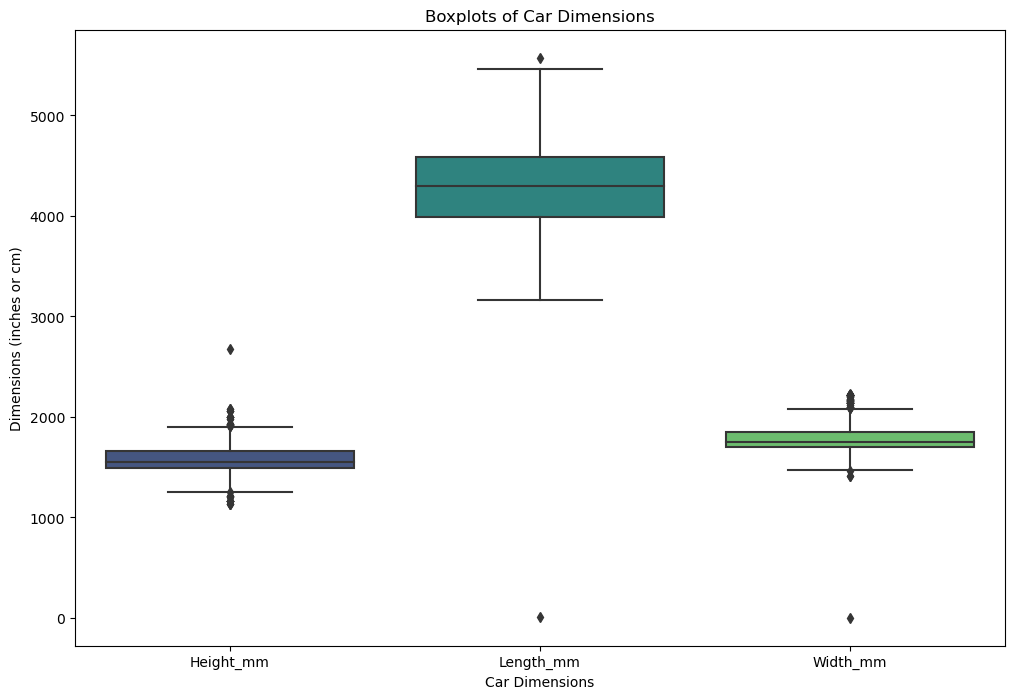

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'df'
# You may need to adjust column names based on your actual data

# Analyze height, length, and width statistics
dimension_stats = df[['Height_mm', 'Length_mm', 'Width_mm']].describe()

# Display the statistics
print("\nDimension Statistics:")
print(dimension_stats)

# Create boxplots for height, length, and width
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Height_mm', 'Length_mm', 'Width_mm']], palette='viridis')
plt.title('Boxplots of Car Dimensions')
plt.ylabel('Dimensions (inches or cm)')
plt.xlabel('Car Dimensions')
plt.show()# Displaying the graph

# Interpretation:
    The most number of cars are having height off avg of 1557 mm, Length of 4330 mm, Width of 1770 mm

# Summary:
    * The most popular car body types are SUV, Sedan Hatchback, Coupe and MUV. 
    * Only 2 cars among all does all capability to adaptto various driving conditions namely
      Normal, Comfort, Eco, Sport, and Power. And these cars are Audi Q8, Audi A8 L.
    * The car manufacturers namely Maruti Suzuki, Datsun, Renault, Mahindra and Tata are 
      giving the highest average city mileage.
    * Since the above mentioned cards are giving highest city avg mileage the manufacturing rate
      of non electric car is also high.
    * Among the car manufacturers Hyundai, Mahindra, Renault, Skoda, Renault manufactured cars 
      are providing highest avg city mileage and does have lots of varieties of cars giving
      the avg city mileage as 20+kms/ltr.
    * When we consider the fact about both city as well as highway mileage Datsun, Maruti Suzuki,
      Tata, Renault and Mahindra are top 5 manufacturers if the customer needs cars for mileage
      based. And the manufacturers named Maserati, Ferrari, Lambo, Bently and Porsche are the cars
      having higher Power and Torque and having higher fuel consumption rate. So the mileage is
      low compared to others.
    * In general Displacement and Mileage does have Negative Correlationn that is When Mileage 
      Decrease Engine Displacement Increases and vice versa.
    * And for the manufacturer Bmv there is higher skewed data which represent that they do 
      manufacture different varieties of cars that has varying mileage.
    * Around 30% of cars having Safety Features like ABS,Airbags and Hill assist together
    * Around 65% of cars are manufactured for 2-4 seaters, and have central locking system and have
      Chid safety locks inbuilted.
    * There are 20% of cars having all types of Alert Systems together namely High-Speed alerts, 
      seat belt reminders, dooor ajar warnings.
    * The prefered car size is liking to have minimum of 1557 mm in height, 4330mm in lenth and
      1770 mm in terms od width. So this is the most found common size of the cars.

# Conclusion:
    
## Popular Car Body Types:
SUV, Sedan Hatchback, Coupe, and MUV are the most preferred car body types.

Recommendation: The new car model could be designed in one of these popular body types to align with market preferences.

## Adaptable Driving Conditions:
Only two cars, Audi Q8 and Audi A8 L, have features to adapt to various driving conditions.

Recommendation: Highlight the adaptability feature in marketing as it sets these cars apart in terms of driving experience.

## Fuel Efficiency:
Maruti Suzuki, Datsun, Renault, Mahindra, and Tata are top manufacturers for average city mileage.

Recommendation: Focus on eco-friendly designs and promote fuel efficiency as a key selling point for the new car model.

## Non-electric Cars for Mileage:
Maruti Suzuki, Datsun, Renault, Mahindra, and Tata are the top 5 non-electric car manufacturers for city and highway mileage.

Recommendation: Emphasize the mileage aspect for non-electric models, targeting customers looking for fuel-efficient options.

## Performance and Mileage:
Cars with higher power, torque, and fuel consumption (Maserati, Ferrari, Lambo, Bentley, Porsche) have lower mileage.

Recommendation: Position the new car model based on a balance between performance and fuel efficiency to cater to a wider audience.

## Correlation Analysis:
Negative correlation between displacement and mileage.

Recommendation: Consider engine displacement carefully, balancing performance with fuel efficiency in the new model.

## Safety Features:
About 30% of cars have ABS, airbags, and hill assist.

Recommendation: Prioritize safety features in the new model, emphasizing them in marketing as a key aspect of the vehicle.

## User Comfort:
Around 65% of cars have 2-4 seaters, central locking, and child safety locks.

Recommendation: Design the new model with a comfortable seating capacity and incorporate central locking and child safety features.

## Alert Systems:
About 20% of cars have all types of alert systems.

Recommendation: Include advanced alert systems in the new model to enhance safety and convenience.

## Dimensional Preferences:
Preferred car size: Minimum height of 1557mm, length of 4330mm, and width of 1770mm.

Recommendation: Align the dimensions of the new car with the common preferences observed in the market.

## Overall Business Conclusions:
* Prioritize fuel efficiency, safety features, and user comfort in the new car model.
* Emphasize a balance between performance and mileage.
* Design the new model in a popular body type based on market trends.
* Consider the observed preferences in dimensions for optimal market acceptance.
    